In [3]:
import cv2
import numpy as np
from scipy.spatial import distance as dist

# Load the classifier
body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

# Initiate the video capture from file
cap = cv2.VideoCapture('walking.avi')

while cap.isOpened():
    
    ret, frame = cap.read()
    violations = 0
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Extract bounding boxes for any bodies identified
    bodies = body_classifier.detectMultiScale(gray, 1.3, 2)
    
    for i in range(len(bodies)):
        (x,y,w,h) = tuple(bodies[i])
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        for j in range(i+1,len(bodies)):
            (x1, y1, w1, h1) = bodies[j]
            if ( dist.euclidean((x, y), (x1, y1)) < frame.shape[0]*frame.shape[1]/10000 ):
                violations+=1

    text = "Social Distancing Violations: " + str(violations)
    cv2.putText(frame, text, (10, frame.shape[0] - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150, 255, 150), 1)
    cv2.imshow('Pedestrians', frame)

    if cv2.waitKey(10) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

# Snapshots

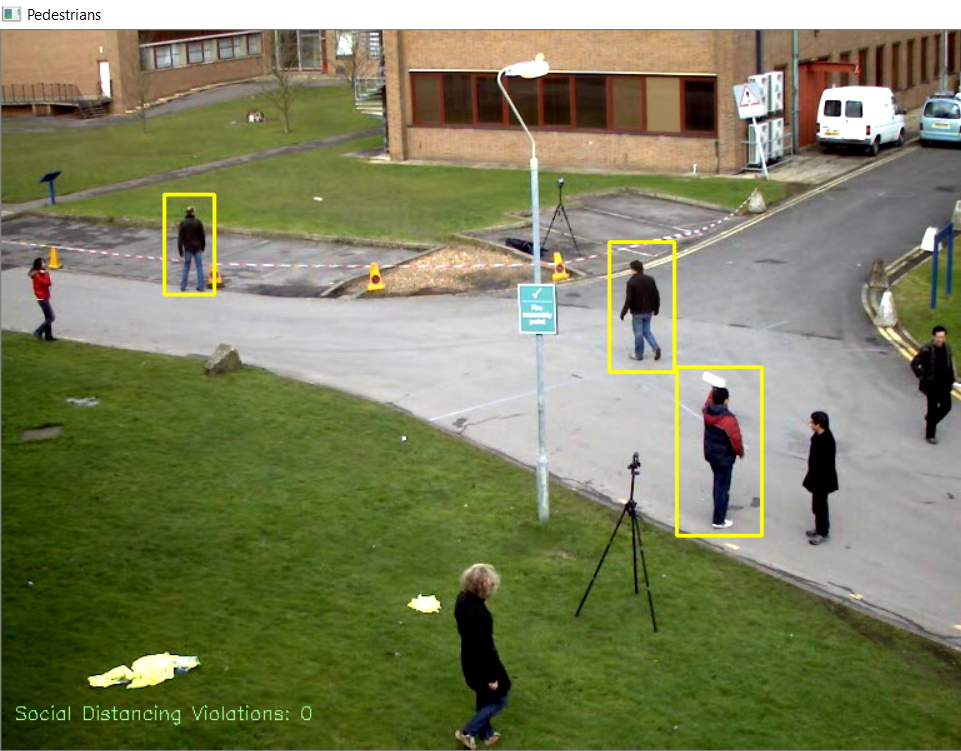

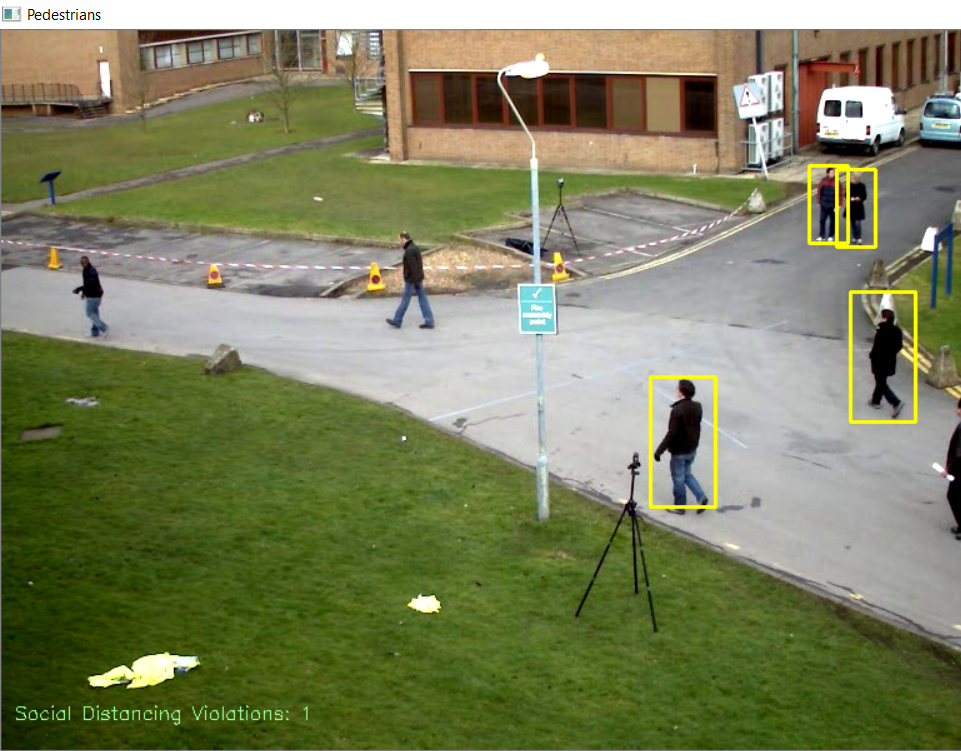